In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('conversion_data.csv')
df.head()

# categorical: country, new_user, source
# numerical: age, total_pages_visited
# target: converted

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [2]:
df.isnull().sum()

# no null

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

In [3]:
df.dtypes

country                object
age                     int64
new_user                int64
source                 object
total_pages_visited     int64
converted               int64
dtype: object

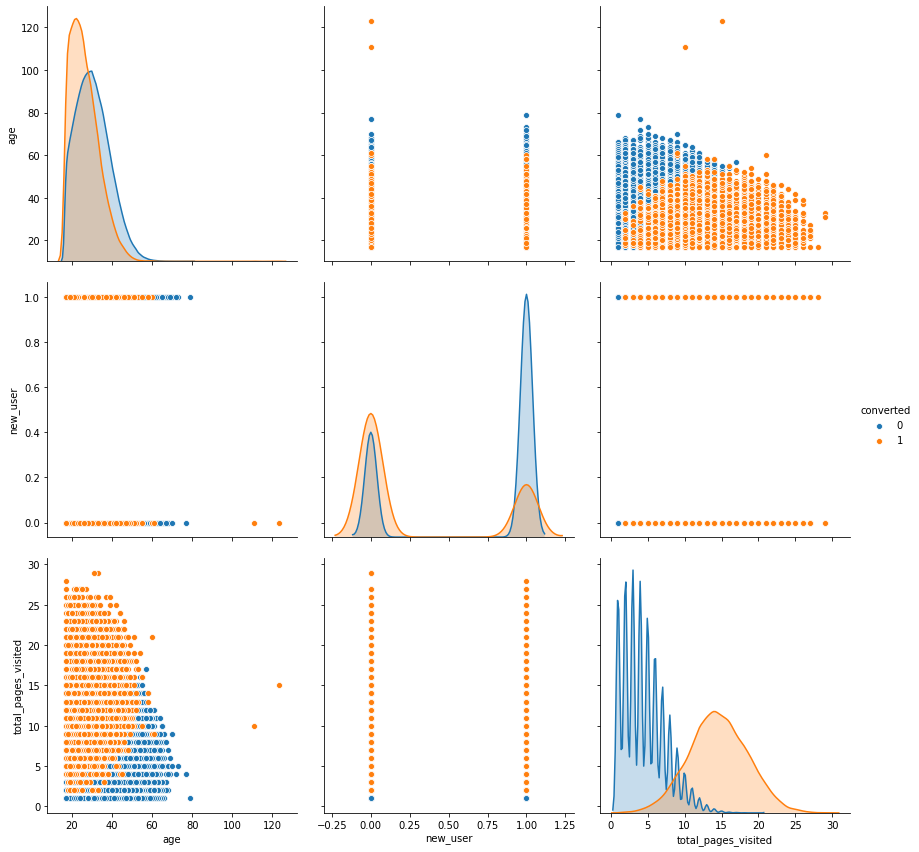

In [4]:
sns.pairplot(df, height=4, vars=['age', 'new_user', 'total_pages_visited'], hue='converted')

# age has two outliers?
# new_user = (total_pages_visited == 1)
# "total_pages_visited" and "converted" are good indicators

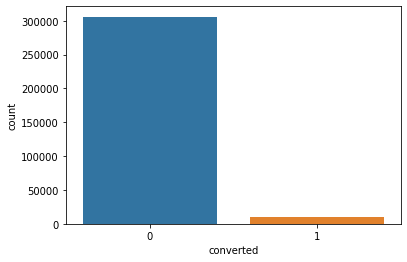

In [5]:
sns.countplot(x='converted', data=df)

#target not balanced

<Figure size 1152x576 with 0 Axes>

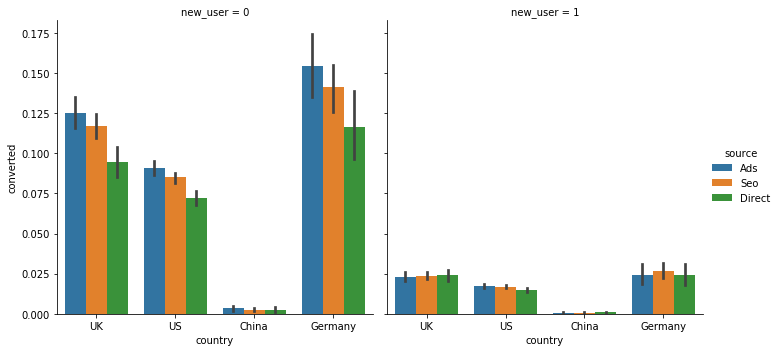

In [6]:
plt.figure(figsize=(16, 8))
sns.catplot(x="country", y="converted", hue="source", col='new_user', kind="bar", data=df)

In [7]:
X = pd.concat([df.drop(['country','new_user','source','converted'], axis=1), 
       pd.get_dummies(df[['country','new_user','source']], drop_first = True)], axis=1)
y = df['converted']

In [8]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)
print(X.columns)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

[False False  True  True  True  True False False]
[4 2 1 1 1 1 3 5]
Index(['age', 'total_pages_visited', 'new_user', 'country_Germany',
       'country_UK', 'country_US', 'source_Direct', 'source_Seo'],
      dtype='object')


In [9]:
import statsmodels.api as sm
logit_model=sm.Logit(y, X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.057774
         Iterations 10
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.595     
Dependent Variable:   converted         AIC:               36552.2753
Date:                 2020-05-25 15:37  BIC:               36637.5884
No. Observations:     316200            Log-Likelihood:    -18268.   
Df Model:             7                 LL-Null:           -45060.   
Df Residuals:         316192            LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       10.0000                                        
---------------------------------------------------------------------
                     Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
age                 -0.2486   0.0019 -128.3105 0.0000 -0.2524 -0.2448
total_pages_vis

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import MultinomialNB

SEED = 101
TEST_SIZE = 0.3

def model_evaluation(y_test, predictions):
    print('Confusion Matrix\n\n{}'.format(confusion_matrix(y_test, predictions)))
    print('\n')
    print('Classification Report\n\n{}'.format(classification_report(y_test, predictions)))
    print('\n')
    print('Accuracy Score\n\n{}'.format(accuracy_score(y_test, predictions)))
    
def linear_model_fit(var):
    X = pd.concat([df.drop(['new_user','country','source','converted'], axis=1), 
           pd.get_dummies(df[var], drop_first = True)], axis=1).values
    y = df['converted'].values
    X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=TEST_SIZE, random_state=SEED)
    # Logistic Regression
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    predictions = logreg.predict(X_test)
    # # Naive Bayes
    # nb = MultinomialNB()
    # nb.fit(X_train, y_train)
    # predictions = nb.predict(X_test)
    model_evaluation(y_test, predictions)

In [11]:
linear_model_fit(['country'])

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix

[[91525   346]
 [ 1071  1918]]


Classification Report

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     91871
           1       0.85      0.64      0.73      2989

    accuracy                           0.99     94860
   macro avg       0.92      0.82      0.86     94860
weighted avg       0.98      0.99      0.98     94860



Accuracy Score

0.9850621969217794


In [12]:
linear_model_fit(['new_user'])

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix

[[91515   356]
 [ 1050  1939]]


Classification Report

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     91871
           1       0.84      0.65      0.73      2989

    accuracy                           0.99     94860
   macro avg       0.92      0.82      0.86     94860
weighted avg       0.98      0.99      0.98     94860



Accuracy Score

0.9851781572844192


In [13]:
linear_model_fit(['source'])

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix

[[91521   350]
 [ 1172  1817]]


Classification Report

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     91871
           1       0.84      0.61      0.70      2989

    accuracy                           0.98     94860
   macro avg       0.91      0.80      0.85     94860
weighted avg       0.98      0.98      0.98     94860



Accuracy Score

0.983955302551128


In [14]:
linear_model_fit(['country', 'new_user', 'source'])

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix

[[91535   336]
 [  967  2022]]


Classification Report

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     91871
           1       0.86      0.68      0.76      2989

    accuracy                           0.99     94860
   macro avg       0.92      0.84      0.87     94860
weighted avg       0.99      0.99      0.99     94860



Accuracy Score

0.9862639679527725
